In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
##Import Library

In [34]:
##Load data
data = pd.read_csv('C:/Users/cs321/Desktop/data2.csv',encoding= 'unicode_escape')

In [35]:
data.head()
##title ##Up or Down ##Trading volume ##High ##Low ##Opening ##Closing 
#These features are stock market and news information for the day before the corresponding date

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45


In [36]:
# create function to get the sentiment score:

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment= sia.polarity_scores(text)
    return sentiment

In [37]:
# get Sentiment score for each day:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0

for i in range (0, len(data['title'])):
    SIA= getSIA(data['title'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [38]:
data['compound']= compound
data['neg']= neg
data['pos']=pos
data['neu']=neu

data

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing,compound,neg,pos,neu
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18,-0.9883,0.107,0.055,0.839
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89,-0.9966,0.163,0.069,0.768
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31,-0.9983,0.257,0.037,0.705
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76,-0.9888,0.127,0.072,0.802
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45,-0.9960,0.174,0.092,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...
2640,2021/12/23,['India freezes bank accounts of Mother Teresa...,0.0098,250.26,36306.61,35954.48,35954.48,36302.38,-0.9615,0.102,0.057,0.841
2641,2021/12/27,['Biden signs $740B defense policy bill to ove...,0.0026,239.09,36527.26,36302.99,36302.99,36398.21,-0.9679,0.102,0.050,0.848
2642,2021/12/28,['Locked-down residents in one of China's bigg...,0.0025,214.40,36571.55,36396.19,36421.14,36488.63,-0.9704,0.099,0.054,0.847
2643,2021/12/29,"[""Pakistan buys 25 China-made J-10C fighter je...",-0.0025,207.64,36679.44,36372.13,36522.48,36398.08,-0.9894,0.169,0.041,0.791


In [39]:
# get subjectivity:

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# get polarity:

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [40]:
data['Subjectivity'] = data['title'].apply(get_subjectivity)
data['Polarity'] = data['title'].apply(get_polarity)

data.head()

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing,compound,neg,pos,neu,Subjectivity,Polarity
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18,-0.9883,0.107,0.055,0.839,0.350014,0.092459
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89,-0.9966,0.163,0.069,0.768,0.390681,0.072976
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31,-0.9983,0.257,0.037,0.705,0.414674,-0.013693
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76,-0.9888,0.127,0.072,0.802,0.375909,0.106521
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45,-0.9960,0.174,0.092,0.735,0.414904,0.026614


In [41]:
Label=[]
for i in range (0, len(data['title'])):
    if data['Up or Down'][i] >= 0:
        Label.append(1)
        #print(Label[i])
    else:
        Label.append(0)
        #print(Label[i])
#Calculate to add up and down columns If greater than 0% mark as 1 Less than 0% mark as 0
data['label'] = Label
data.head()

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing,compound,neg,pos,neu,Subjectivity,Polarity,label
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18,-0.9883,0.107,0.055,0.839,0.350014,0.092459,1
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89,-0.9966,0.163,0.069,0.768,0.390681,0.072976,1
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31,-0.9983,0.257,0.037,0.705,0.414674,-0.013693,0
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76,-0.9888,0.127,0.072,0.802,0.375909,0.106521,0
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45,-0.9960,0.174,0.092,0.735,0.414904,0.026614,0


In [42]:
train = data[data['Date'] < '2017']
test = data[data['Date'] > '2017']
#test set training set division by date

In [43]:
trainheadlines = train['title']

In [44]:
basicvectorizer = CountVectorizer(stop_words='english')
basictrain = basicvectorizer.fit_transform(trainheadlines)
print(basictrain.shape)

(1510, 29872)


In [45]:
##Using RandomForestRegressor for Modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
randomforestregressor = RandomForestRegressor()
randomforestregressor.fit(basictrain, train["Up or Down"]) 

RandomForestRegressor()

In [46]:
testheadlines = test['title']
basictest = basicvectorizer.transform(testheadlines)
predictions = randomforestregressor.predict(basictest)

In [47]:
randomforestregressor.score(basictrain, train["Up or Down"])

0.8541689637033844

In [48]:
randomforestregressor.score(basictest, test["Up or Down"])
##The effect is not satisfactory to switch to the classification method to predict

-0.018164612176392758

In [49]:
##Using Random Forest Classification for Modeling
from sklearn.ensemble import RandomForestClassifier
randomforestclassifier = RandomForestClassifier(n_estimators=500,criterion='entropy')
randomforestclassifier.fit(basictrain, train["label"])

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [50]:
randomforestclassifier.score(basictrain, train["label"])

1.0

In [51]:
randomforestclassifier.score(basictest, test["label"])

0.5621145374449339

In [52]:
## Using support vector machines
from sklearn.svm import SVC
svm =SVC(degree=3)
svm.fit(basictrain, train["label"])

SVC()

In [53]:
svm.score(basictrain, train["label"])

0.9900662251655629

In [54]:
svm.score(basictest, test["label"])

0.5612334801762114

In [55]:
##神经网络

In [56]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2))
clf.fit(basictrain, train["label"])

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

In [57]:
clf.score(basictrain, train["label"])

0.9629139072847682

In [58]:
clf.score(basictest, test["label"])

0.5559471365638766

In [30]:
##Text Mining Poor Results Switch to Sentiment Analysis

In [31]:
###SENTIMENT ANALYSIS

In [32]:
data.head()

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing,compound,neg,pos,neu,Subjectivity,Polarity,label
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18,-0.9883,0.107,0.055,0.839,0.350014,0.092459,1
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89,-0.9966,0.163,0.069,0.768,0.390681,0.072976,1
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31,-0.9983,0.257,0.037,0.705,0.414674,-0.013693,0
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76,-0.9888,0.127,0.072,0.802,0.375909,0.106521,0
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45,-0.9960,0.174,0.092,0.735,0.414904,0.026614,0


In [30]:
#Create new dataframe contain relevants features:

df= data[['label','Up or Down','Opening', 'High', 'Low','Trading volume','Subjectivity','Polarity','compound','neg','pos','neu']]



In [31]:
#create the feature data set:

In [32]:
num_col = ['Up or Down','Opening', 'High', 'Low','Trading volume','Subjectivity','Polarity','compound','neg','pos','neu']
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
num_features = standardscaler.fit_transform(df[num_col])
X=num_features
X

array([[ 0.12296738, -1.29955022, -1.30490607, ..., -1.07101797,
        -0.33896578,  1.19883163],
       [ 0.20690253, -1.29688878, -1.29825633, ...,  0.49364074,
         0.32072324, -0.63074251],
       [-0.25007775, -1.29263289, -1.29914475, ...,  3.12003214,
        -1.18713738, -2.25416745],
       ...,
       [ 0.18825028,  2.41988849,  2.41531905, ..., -1.29454064,
        -0.38608643,  1.40498083],
       [-0.27805613,  2.43511776,  2.43145582, ...,  0.66128274,
        -0.9986548 , -0.03806356],
       [-0.19412098,  2.41458515,  2.40236507, ..., -0.59603229,
         1.16889483, -0.08960086]])

In [33]:
#create the target data set:
y= np.array(df['label'])
y

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
# Split the data:

x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state= 0)

In [35]:
#create and train the model:

model= LinearDiscriminantAnalysis().fit(x_train, y_train)

# Model predicton:

predict= model.predict(x_test)

predict

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [36]:
##SENTIMENT ANALYSIS Classification Report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       242
           1       0.87      0.97      0.92       287

    accuracy                           0.91       529
   macro avg       0.92      0.90      0.90       529
weighted avg       0.91      0.91      0.90       529



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

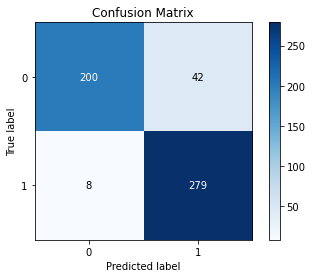

In [37]:
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test,predict)

In [38]:
##LDA Topic Model

In [39]:
data.head()

,Date,title,Up or Down,Trading volume,High,Low,Opening,Closing,compound,neg,pos,neu,Subjectivity,Polarity,label
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,0.0018,178.63,11698.22,11635.74,11670.90,11691.18,-0.9883,0.107,0.055,0.839,0.350014,0.092459,1
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,0.0027,169.99,11742.68,11652.89,11688.61,11722.89,-0.9966,0.163,0.069,0.768,0.390681,0.072976,1
2,2011/1/5,['Italy becomes the first country to ban plast...,-0.0022,193.08,11736.74,11667.46,11716.93,11697.31,-0.9983,0.257,0.037,0.705,0.414674,-0.013693,0
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,-0.0019,188.72,11726.94,11599.68,11696.86,11674.76,-0.9888,0.127,0.072,0.802,0.375909,0.106521,0
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,-0.0032,150.34,11677.33,11573.87,11672.34,11637.45,-0.9960,0.174,0.092,0.735,0.414904,0.026614,0


In [59]:
data.to_excel("data情感.xlsx",sheet_name="sheet2")

In [40]:
# Remove the columns
papers = data.drop(columns=['Up or Down','Trading volume','High','Low','Opening','Closing','compound','neg','pos','neu','Subjectivity','Polarity'], axis=1)

# Print out the first rows of papers
papers.head()

,Date,title,label
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,1
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,1
2,2011/1/5,['Italy becomes the first country to ban plast...,0
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,0
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,0


In [41]:
Title_Growth=[]
Title_reduction=[]

In [42]:
## Classify titles based on up and down 0 and 1
for i in range (0, len(papers['title'])):
    if papers['label'][i] == 1:
        Title_Growth.append(papers['title'][i])
    if papers['label'][i] == 0:
        Title_reduction.append(papers['title'][i])


In [43]:
Title_Growth = pd.DataFrame(Title_Growth,columns =[ 'growth'])
Title_reduction = pd.DataFrame(Title_reduction,columns =['reduction'])

In [44]:
#Calculate to add up and down columns If greater than 0% mark as 1 Less than 0% mark as 0
papers_growth = Title_Growth
papers_reduction = Title_reduction
papers = papers.drop(['label'], axis=1)
papers.tail()

,Date,title
2640,2021/12/23,['India freezes bank accounts of Mother Teresa...
2641,2021/12/27,['Biden signs $740B defense policy bill to ove...
2642,2021/12/28,['Locked-down residents in one of China's bigg...
2643,2021/12/29,"[""Pakistan buys 25 China-made J-10C fighter je..."
2644,2021/12/30,['PA President Abbas accuses Israel of ??orga...


In [45]:
papers_growth.head()

,growth
0,['Punjab(Pakistan) governor Salman Taseer assa...
1,['Cable from the U.S. Embassy in Tel Aviv says...
2,"['Uh, reddit? Brisbane, AU (one of our largest..."
3,['West African farmers have succeeded in cutti...
4,['Haiti reconstruction firms only get $1.60 fo...


In [46]:
papers_reduction.head()

,reduction
0,['Italy becomes the first country to ban plast...
1,['Egypt's Muslims attend Coptic Christmas mass...
2,['Russia's Murrow moment - Leonid Parfyonov's ...
3,"[""Aussie here: Just want everyone to know that..."
4,['Several thousand Israelis protested in Tel A...


In [47]:
# Remove punctuation
papers['paper_text_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?'')(]', '', x))
papers_growth['paper_text_processed'] = papers_growth['growth'].map(lambda x: re.sub('[,\.!?'')(]', '', x))
papers_reduction['paper_text_processed'] = papers_reduction['reduction'].map(lambda x: re.sub('[,\.!?'')(]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
papers_growth['paper_text_processed'] = papers_growth['paper_text_processed'].map(lambda x: x.lower())
papers_reduction['paper_text_processed'] = papers_reduction['reduction'].map(lambda x: re.sub('[,\.!?'')(]', '', x))
# Print out the first rows of papers
papers.head()

,Date,title,paper_text_processed
0,2011/1/3,['Punjab(Pakistan) governor Salman Taseer assa...,['punjabpakistan governor salman taseer assass...
1,2011/1/4,['Cable from the U.S. Embassy in Tel Aviv says...,['cable from the us embassy in tel aviv says i...
2,2011/1/5,['Italy becomes the first country to ban plast...,['italy becomes the first country to ban plast...
3,2011/1/6,['Egypt's Muslims attend Coptic Christmas mass...,['egypt's muslims attend coptic christmas mass...
4,2011/1/7,['Russia's Murrow moment - Leonid Parfyonov's ...,['russia's murrow moment - leonid parfyonov's ...


In [48]:
papers_reduction.head()

,reduction,paper_text_processed
0,['Italy becomes the first country to ban plast...,['Italy becomes the first country to ban plast...
1,['Egypt's Muslims attend Coptic Christmas mass...,['Egypt's Muslims attend Coptic Christmas mass...
2,['Russia's Murrow moment - Leonid Parfyonov's ...,['Russia's Murrow moment - Leonid Parfyonov's ...
3,"[""Aussie here: Just want everyone to know that...","[""Aussie here: Just want everyone to know that..."
4,['Several thousand Israelis protested in Tel A...,['Several thousand Israelis protested in Tel A...


In [49]:
!pip install wordcloud
# Import the wordcloud library
from wordcloud import WordCloud,STOPWORDS

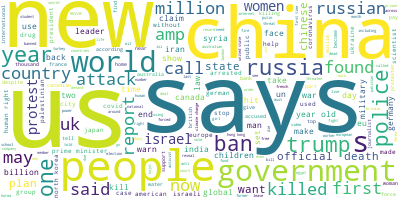

In [50]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
long_string_growth = ','.join(list(papers_growth['paper_text_processed'].values))
long_string_reduction = ','.join(list(papers_reduction['paper_text_processed'].values))
# Create a WordCloud object
stopwords = STOPWORDS
stopwords.add('say')
#stopwords.add('says')
stopwords.add('will')
#stopwords.add('new')
stopwords.add('u')
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',stopwords = stopwords)
wordcloud_growth = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',stopwords = stopwords)
wordcloud_reduction = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',stopwords = stopwords)
# Generate a word cloud
wordcloud_growth.generate(long_string_growth)
wordcloud_reduction.generate(long_string_reduction)
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


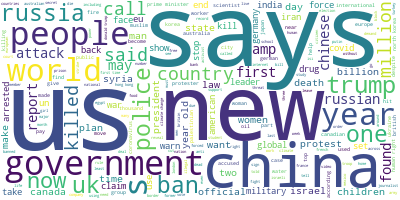

In [51]:
wordcloud_growth.to_image()

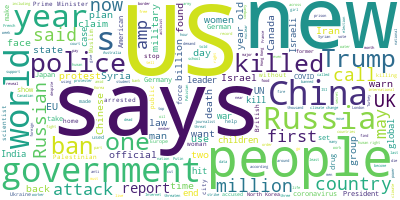

In [52]:
wordcloud_reduction.to_image()

D:\Soft\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


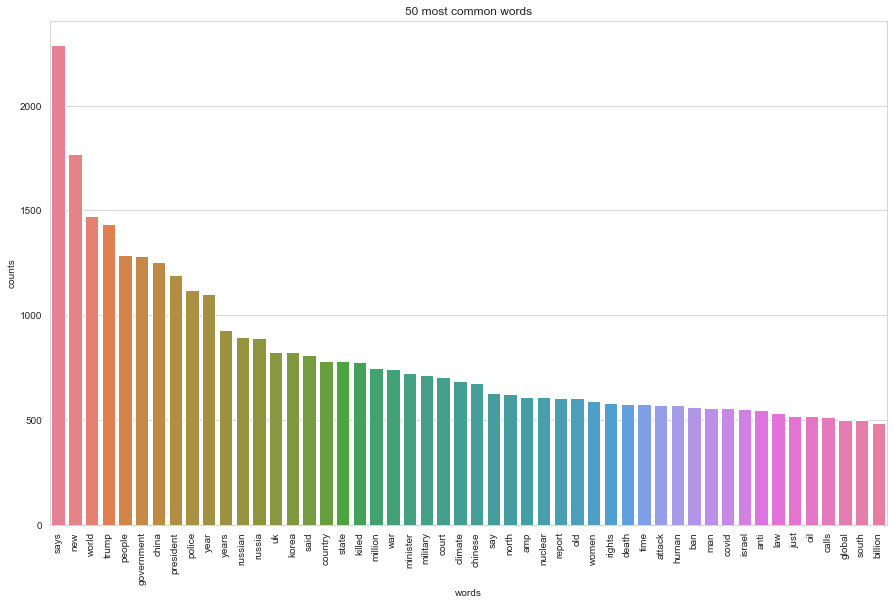

In [53]:
# Load the library with the CountVectorizer method
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='50 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers_growth['paper_text_processed'])
# Visualise the 50 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [54]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 4
number_words = 30
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
says trump new president world people china government police year russia russian years uk korea state war million chinese country

Topic #1:
says new world trump china government people year president years police country uk said war state russian covid killed korea

Topic #2:
says new world people police china trump government year years president korea killed russian climate minister said russia north country

Topic #3:
says new government world people police china president russia year russian uk million said trump years killed military court state


In [55]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
import os

LDAvis_data_filepath = os.path.join('./ldavis_prepared_' + str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_' + str(number_topics) + '.html')

D:\Soft\ANACONDA\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Wall time: 3.21 s
